In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muthuj7/weather-dataset")

print("Path to dataset files:", path)

# Construct the full path to the CSV file
csv_path = os.path.join(path, 'weatherHistory.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_path)

# Select relevant features (e.g., temperature)
features = ['Temperature (C)']
df_features = df[features]

# Handle missing values (e.g., forward fill)
df_features.fillna(method='ffill', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_features)

# Create sequences
sequence_length = 10 # Number of past time steps
prediction_horizon = 1 # Number of future time steps

X, y = [], []
for i in range(len(scaled_data) - sequence_length - prediction_horizon + 1):
    X.append(scaled_data[i : i + sequence_length])
    y.append(scaled_data[i + sequence_length : i + sequence_length + prediction_horizon])

X = np.array(X)
y = np.array(y)

# Split into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Using Colab cache for faster access to the 'weather-dataset' dataset.
Path to dataset files: /kaggle/input/weather-dataset


/tmp/ipython-input-596116914.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features.fillna(method='ffill', inplace=True)
/tmp/ipython-input-596116914.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.fillna(method='ffill', inplace=True)


Shape of X_train: (77154, 10, 1)
Shape of y_train: (77154, 1, 1)
Shape of X_test: (19289, 10, 1)
Shape of y_test: (19289, 1, 1)


In [4]:
import os
print(os.listdir(path))

['.nfs000000004ae58226000000dd', 'weatherHistory.csv']


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=prediction_horizon))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model (if not already compiled)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 0.0136 - val_loss: 0.0012
Epoch 2/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 0.0020 - val_loss: 5.5531e-04
Epoch 3/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - loss: 0.0011 - val_loss: 7.0552e-04
Epoch 4/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 9.1224e-04 - val_loss: 4.3036e-04
Epoch 5/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - loss: 8.4157e-04 - val_loss: 4.5877e-04
Epoch 6/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 8.4539e-04 - val_loss: 5.6226e-04
Epoch 7/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 8.2087e-04 - val_loss: 4.7148e-04
Epoch 8/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - loss: 8.2718e-04 - val_loss: 4.3962e-04
Epoch 9/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 8.1378e-04 - val_loss: 4.6942e-04
Epoch 10/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - loss: 7.8259e-04 - val_loss: 4.7382e-04


In [10]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

Test Loss: 0.00042347583803348243


In [12]:
last_sequence = scaled_data[-sequence_length:]
last_sequence = last_sequence.reshape(1, sequence_length, 1) # Reshape for prediction

predicted_future_temperatures = []

# Use the best model for prediction (assuming best_model is the hyperparameter tuned model)
# If you have run other experiments after hyperparameter tuning,
# you might need to explicitly select the best model here.
best_model = model # Assuming the 'model' variable holds the best tuned model

for _ in range(20):
    # Predict the next time step
    next_prediction_scaled = best_model.predict(last_sequence)

    # Append the prediction to the sequence
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction_scaled.reshape(1, 1, 1), axis=1)

    # Store the prediction
    predicted_future_temperatures.append(next_prediction_scaled[0][0])

# Inverse transform the scaled predictions
predicted_future_temperatures = scaler.inverse_transform(np.array(predicted_future_temperatures).reshape(-1, 1))

# Print the predicted future temperatures
print("Predicted Temperatures for the Next 20 Days:")
for i, temp in enumerate(predicted_future_temperatures):
    print(f"Day {i+1}: {temp[0]:.2f} C")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Temperatures for the Next 20 Days:
Day 1: 19.22 C
Day 2: 18.22 C
Day 3: 17.45 C
Day 4: 16.87 C
Day 5: 16.40 C
Day 6: 15.99 C
Day 7: 15.64 C
Day 8: 15.33 C
Day 9: 15.06 C
Day 10: 14.81 C
Day 11: 14.57 C
Day 12: 14.31 C
Day 13: 14.

603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


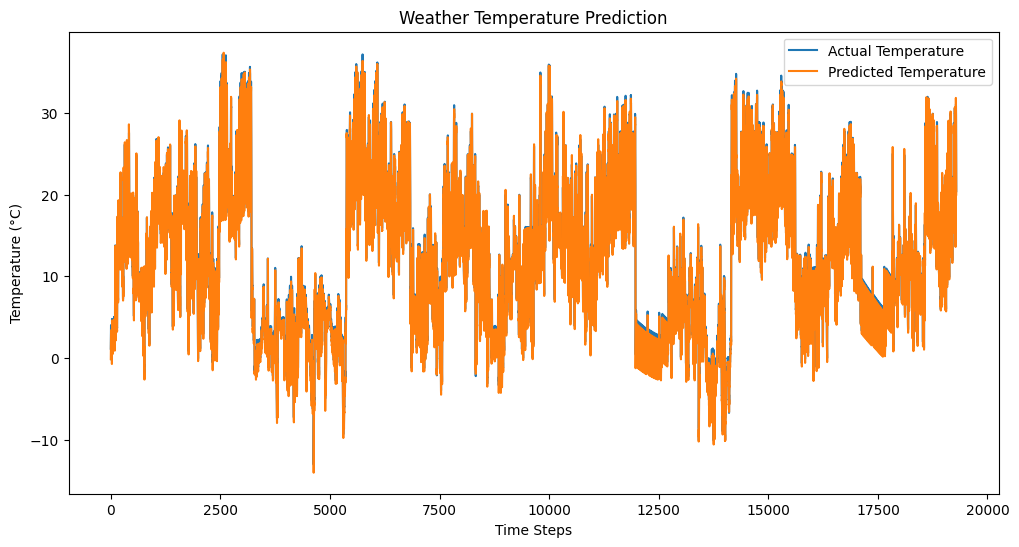

In [15]:
import matplotlib.pyplot as plt

# Use the trained model for plotting
best_model = model
X_test_best = X_test
y_test_best = y_test
scaler_best = scaler


# Make predictions on the test data using the best model
predictions_best = best_model.predict(X_test_best)

# Inverse transform the scaled predictions and actual values
# Need to handle the case where y_test might have more than one feature in the original scaled data
if y_test_best.shape[-1] > 1:
    # If the original scaled data had multiple features, we need to create a dummy array
    # with the predicted values in the correct column (Temp3pm is the last column in expanded_features)
    dummy_predictions = np.zeros((predictions_best.shape[0], scaler_best.n_features_in_))
    dummy_predictions[:, -1] = predictions_best[:, 0] # Place Temp3pm predictions in the last column
    predicted_temperatures_best = scaler_best.inverse_transform(dummy_predictions)[:, -1]

    dummy_actual = np.zeros((y_test_best.shape[0], scaler_best.n_features_in_))
    dummy_actual[:, -1] = y_test_best[:, 0, 0] # Place actual Temp3pm values in the last column
    actual_temperatures_best = scaler_best.inverse_transform(dummy_actual)[:, -1]
else:
    # If the original scaled data had only one feature, inverse transform directly
    predicted_temperatures_best = scaler_best.inverse_transform(predictions_best)
    actual_temperatures_best = scaler_best.inverse_transform(y_test_best.reshape(-1, 1))


# Plot the actual and predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(actual_temperatures_best, label='Actual Temperature')
plt.plot(predicted_temperatures_best, label='Predicted Temperature')
plt.title(f'Weather Temperature Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()